In [1]:
import torch
import numpy as np
from itertools import product
from matplotlib import pyplot as plt
import copy

In [2]:
given_demand = np.array([[50,60,75],[75,90,100],[60,75,90]]).reshape(3,3)
products = (list(product(range(3),repeat=3)))
senarios = [[given_demand[i][j]  for i,j in enumerate(pro)] for pro in products]

In [3]:
def value_grad_func(x,demand_array,failures):

    # Convert the numpy arrays to torch tensors
    x = torch.tensor(x, dtype=torch.float64, requires_grad=True)

    d = torch.tensor(demand_array)

    # Calculate the cost
    y = 6*(x[0] + x[1] + x[2]) + 5*(x[3] + x[4] + x[5]) + 1*x[0] + 3*x[3] + 3*x[1] + 2*x[4] + 2*x[2] + 2*x[5] + 40*(torch.max(torch.tensor(0),d[0]-failures[0]*x[0]-failures[1]*x[3])) + \
    40*(torch.max(torch.tensor(0),d[1]-failures[2]*x[1]-failures[3]*x[4])) + 40*(torch.max(torch.tensor(0),d[2]-failures[4]*x[2]-failures[5]*x[5]))

    y.backward()

    return y.detach().numpy(), x.grad.numpy()


In [4]:

# Intialize the variables

N= 12000
a = 0.1
b = 100
x= np.zeros(6)
x_av = np.zeros(6)
y_av = 0
x_avs = []
y_avs = []
y_s = []

for k in range(N):

    senarios = [[given_demand[i][j]  for i,j in enumerate(pro)] for pro in products]
    destruct = np.random.binomial(1,0.3,(1,6))
    destruct_unit = np.where(destruct == 1, 0.5, 1)

    for demand in senarios:

        # Calculate the gradient
        x = copy.deepcopy(x)
        y, grad = value_grad_func(x,demand,destruct_unit.flatten())

        y_s.append(y)

        # Calculate the step size
        stp = a/(b+np.sqrt(k))

        # Update the variables
        x = x - stp*grad

        m =  np.ones(3)
        x[:3] = x[:3] - np.maximum(0,np.dot(m,x[:3])-250)*m/(sum(m))
        x[3:] = x[3:] - np.maximum(0,np.dot(m,x[3:])-250)*m/(sum(m))

    y_av = (y_av*k + y)/(k+1)
    x_av = (x_av*k + x)/(k+1)

    x_avs.append(x_av)
    y_avs.append(y_av)


      
    # if k%100 == 0:
    #     print(x)
    #     print(y)

        




    




        




In [8]:
y_avs[-10:]

[np.float64(3355.3084270768654),
 np.float64(3355.382976643246),
 np.float64(3355.341325311802),
 np.float64(3355.4616849211834),
 np.float64(3355.5808899520107),
 np.float64(3355.540254460339),
 np.float64(3355.4978405469933),
 np.float64(3355.5848837019958),
 np.float64(3355.5415446426405),
 np.float64(3355.5006393251356)]

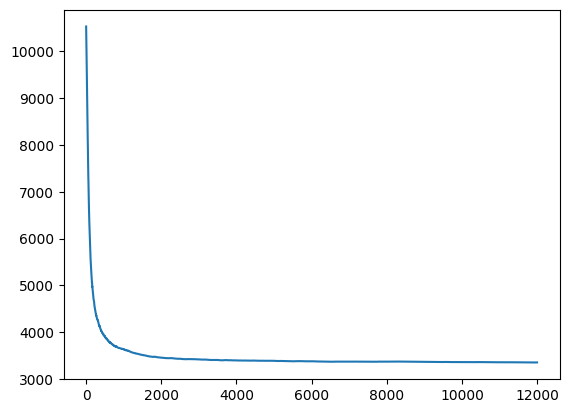

In [7]:
# Plot y_avs
plt.plot(y_avs)
plt.show()

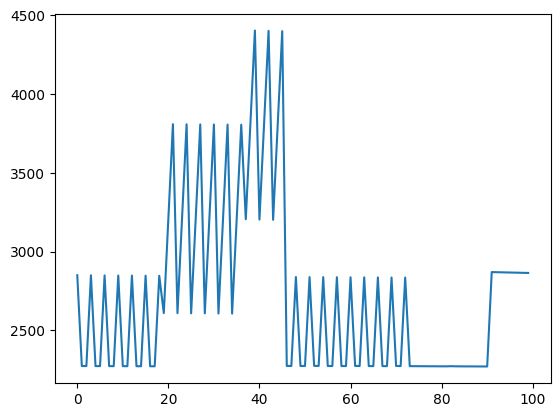

In [10]:
plt.plot(y_s[-100:])

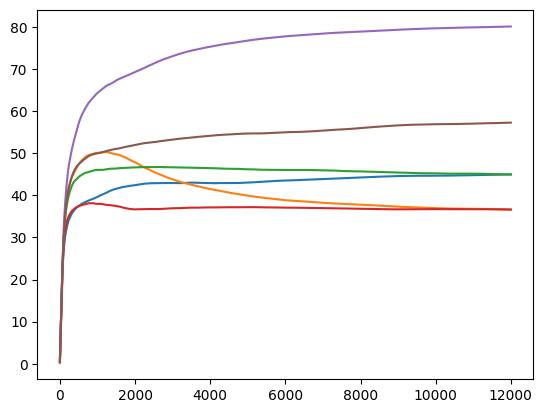

In [683]:
# Plot individual x_avs
x_avs = np.array(x_avs)
for i in range(6):
    plt.plot(x_avs[:,i])

In [126]:
def value_grad_func2(Buy,Z,gamma):

    # Convert the numpy arrays to torch tensors
    Buy = torch.tensor(Buy, dtype=torch.float64, requires_grad=True)

    Z = torch.tensor(Z)

    # Calculate the cost
    y = torch.sum(torch.abs(Buy-gamma*Z))

    y.backward()

    return y.detach().numpy(), Buy.grad.numpy()

Buy[0] = 0.3293    BuyAv[0] = 0.337
Buy[1] = 0.1294    BuyAv[1] = 0.1251
Buy[2] = 0.5355    BuyAv[2] = 0.5312


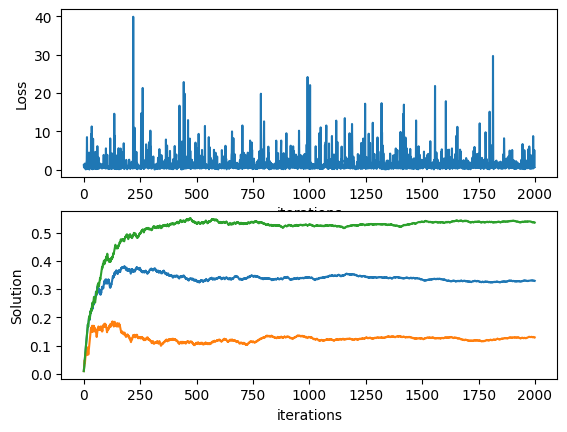

In [131]:
import numpy as np
import matplotlib.pyplot as plt


N = 2000
N0 = 1000        # when to start averaging

m = 3
C = 1.0

# generate a sample

mu = 1.0
sigma = 1.0

alpha = np.array([2., 1., 3.])

gamma = 0.5

# SGD iterations

a = 1 
b = 100
Loss = np.empty(N)
Table = np.empty((N,m))
Buy = np.zeros(m)
BuyAv = np.zeros(m)     # this will be the sum of decisions multiplied by steps for n > N0
StepSum = 0             # this will be the sum of steps for n > N0    

rng = np.random.default_rng()  # instantiate the random number generator

for n in range(N):
    
    # simulate the viewers, rng() continues...
    
    V = rng.lognormal(mu,sigma,1)
    Y = rng.dirichlet(alpha,1)
    Z = V*Y
    # calculate the loss and subgradient
    # Deviation = (Buy-gamma*Z).flatten()   
    # Loss[n] = sum(np.abs(Deviation)) 
    # G = np.sign(Deviation)
    Loss[n], G = value_grad_func2(Buy,Z,gamma)
    # make a step in negative subgradient
    step = a/(b+n)
    Buy = Buy - step*G
    # project on the feasible set
    Buy = Buy - np.ones(m)*max(0,sum(Buy)-C)/m
    Table[n] = Buy      # record the iterates for the plot, not needed by the method
    if (n > N0):
        BuyAv += step*Buy
        StepSum += step
    
BuyAv = BuyAv/StepSum   # normalize the convex combination of the iterates n > N0
for i in range(m):
    print("Buy[%d] =" %i, round(Buy[i],4),"   BuyAv[%d] =" %i, round(BuyAv[i],4) )
      
iter = np.arange(N)


# Plot the observations and the solution

fig, axs = plt.subplots(2, 1)
axs[0].plot(iter, Loss)
axs[0].set_xlabel("iterations")
axs[0].set_ylabel("Loss")

axs[1].plot(iter, Table)
axs[1].set_xlabel("iterations")
axs[1].set_ylabel("Solution")


# Display the plot
plt.show()
    



In [ ]:
Buy[0] = 0.3349    BuyAv[0] = 0.3337
Buy[1] = 0.125    BuyAv[1] = 0.1233
Buy[2] = 0.5391    BuyAv[2] = 0.5393

In [ ]:
import numpy as np

import matplotlib.pyplot as plt 


# Set parameters
mean = 300
sigma = 300
size = 1000000 #umber of samples

# Generate normal distribution samples
samples = np.random.normal(loc=mean, scale=sigma, size=size)

# samples = np.random.beta(2,5,10000)

(array([7.0000e+00, 6.0000e+00, 4.0000e+00, 1.0000e+01, 1.1000e+01,
        1.1000e+01, 2.1000e+01, 2.6000e+01, 5.2000e+01, 7.1000e+01,
        9.4000e+01, 1.3800e+02, 1.9100e+02, 2.1700e+02, 3.1600e+02,
        4.1500e+02, 5.2600e+02, 7.0700e+02, 9.2700e+02, 1.1600e+03,
        1.4730e+03, 1.8820e+03, 2.2860e+03, 2.8310e+03, 3.5570e+03,
        4.1840e+03, 5.1030e+03, 6.0030e+03, 7.3740e+03, 8.6010e+03,
        1.0068e+04, 1.1629e+04, 1.3185e+04, 1.5323e+04, 1.7056e+04,
        1.9022e+04, 2.1208e+04, 2.2971e+04, 2.5208e+04, 2.7342e+04,
        2.9382e+04, 3.0930e+04, 3.2553e+04, 3.3861e+04, 3.5132e+04,
        3.5935e+04, 3.6894e+04, 3.7294e+04, 3.6739e+04, 3.6719e+04,
        3.5869e+04, 3.5086e+04, 3.3583e+04, 3.2277e+04, 3.0898e+04,
        2.8944e+04, 2.6774e+04, 2.4806e+04, 2.2756e+04, 2.0688e+04,
        1.8571e+04, 1.6818e+04, 1.4890e+04, 1.2921e+04, 1.1282e+04,
        9.8770e+03, 8.3960e+03, 7.2810e+03, 6.0680e+03, 5.0520e+03,
        4.1320e+03, 3.3640e+03, 2.8170e+03, 2.24

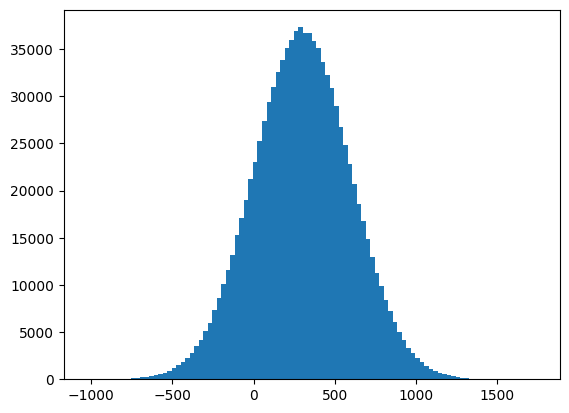

In [652]:
plt.hist(samples, bins=100)

In [663]:
chi = 0.4

In [664]:
# Compute mean semideviation
mean_sd = np.mean(samples) - chi*(np.mean(np.maximum(0,np.mean(samples)-samples)))

In [665]:
np.mean(samples)

np.float64(299.91547650248594)

In [666]:
mean_sd

np.float64(252.05527968088364)

In [667]:
# Compute iteratively using one sample at a time
mean_sd_iterative = 1
mean_samples = 0
array = []
j = 1
for i in samples:
    temp_mean_sd =  mean_samples - chi*(np.maximum(0, mean_samples-i))

    mean_samples = (j*mean_samples + i)/(j+1)

    # Calculate itrative update using recursive update formula
    mean_sd_iterative = (j*mean_sd_iterative + temp_mean_sd)/(j+1)
    #print(mean_sd_iterative)

    j+=1

In [668]:
mean_sd_iterative

np.float64(252.01939056043605)

In [669]:
# Compute iteratively using one sample at a time
mean_sd_iterative = 0
mean_samples = 0
array = []
j = 1
for i in samples:
    temp_mean_sd =  mean_samples - chi*(np.maximum(0, mean_samples-i))

    mean_samples = (j*mean_samples + i)/(j+1)

    # Calculate itrative update using recursive update formula
    mean_sd_iterative = (j*mean_sd_iterative + temp_mean_sd)/(j+1)

    j+=1

In [670]:
mean_sd_iterative

np.float64(252.01938956043693)

In [671]:
# Compute iteratively using one sample at a time
mean_sd_iterative = 1
mean_samples = 0
array = []
j = 1
for i in samples:

    # if mean_sd_iterative < i:
    #     mean_samples = mean_sd_iterativ
   
    temp_mean_sd =  i  - chi*(np.maximum(0, mean_sd_iterative-i))

    # mean_samples = (j*mean_samples + i)/(j+1)

    # Calculate itrative update using recursive update formula
    mean_sd_iterative = (j*mean_sd_iterative + temp_mean_sd)/(j+1)
 

    j+=1

In [672]:
mean_sd_iterative

np.float64(259.68390045341823)

250.0 250.00000000000003
249.90139449246084 249.9013944924609
250.0 250.0
249.9019607843137 249.9019607843137
249.804147945872 249.804147945872
249.70653887016937 249.70653887016937
249.60911642576934 249.60911642576932
249.51186705339617 249.5118670533962
249.4147796747554 249.41477967475544
249.31784501775857 249.3178450177586
249.2210551737205 249.2210551737205
249.12440329307884 249.12440329307884
249.0278833684523 249.0278833684523
248.93149007522854 248.93149007522857
248.83521865143908 248.8352186514391
248.73906480528524 248.73906480528527
248.64302464263434 248.64302464263437
248.54709460926142 248.5470946092614
248.45127144419132 248.45127144419132
248.35555214154098 248.355552141541
248.25993391896853 248.25993391896856
248.16441419132755 248.16441419132758
248.0689905484723 248.0689905484723
247.97366073640893 247.97366073640893
247.8784226411708 247.87842264117083
248.16386773988668 248.1638677398867
248.0688072289298 248.06880722892987
247.97383280315978 247.9738328031598

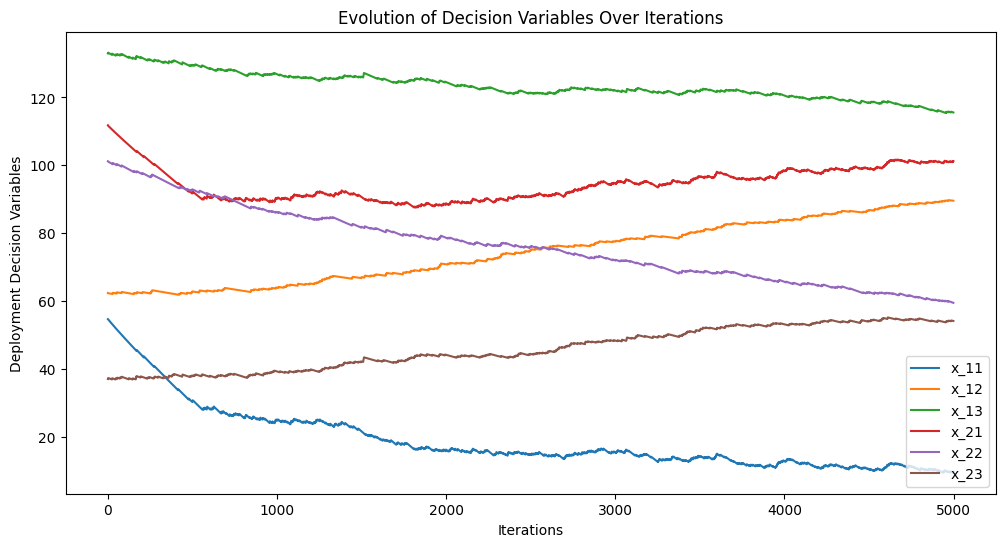

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
rng = np.random.default_rng()

# Problem Parameters
num_centers = 2
num_targets = 3
capacity = [250, 250]  # Center capacities
deployment_cost = np.array([[6, 1, 3], [5, 3, 2]])  # Shape (2,3)
penalty = 40  # Shortage penalty per unit

# Demand Levels (Low, Medium, High) - equally likely
demand_levels = np.array([[50, 60, 75], [75, 90, 100], [60, 75, 90]])

# Failure probability per route
failure_prob = 0.3

# Step-size parameters
a, b, p = 1, 100, 0.5  # Adjustable step-size schedule
max_iters = 5000  # Number of iterations

# Initialize decision variables (random shipments within feasible set)
x = rng.uniform(0, capacity[0] / num_targets, (num_centers, num_targets))
x = (x / np.sum(x, axis=1, keepdims=True)) * np.array(capacity).reshape(-1, 1)

# Storage for tracking evolution
history = np.zeros((max_iters, num_centers, num_targets))

# Stochastic Subgradient Descent Algorithm
for k in range(1, max_iters + 1):
    # Step-size schedule: η_k = a / (b + k^p)
    eta_k = a / (b + k**p)

    # Corrected demand sampling (selects one demand level per target)
    D = demand_levels[rng.integers(0, 3, size=num_targets), np.arange(num_targets)]  # Shape (3,)

    # Sample route failures (Bernoulli(0.3))
    Z = rng.binomial(1, failure_prob, (num_centers, num_targets))  # Shape (2,3)

    # Compute effective supply considering failures
    S = np.sum(x * (1 - 0.5 * Z), axis=0)  # Shape (3,)

    # Compute shortage penalty (when demand > supply)
    shortage = (D > S).astype(float) * penalty  # Shape (3,)

    # Correct broadcasting: reshape shortage for proper alignment
    shortage_expanded = shortage.reshape(1, -1)  # Shape (1,3)

    # Compute stochastic subgradient
    g = deployment_cost - shortage_expanded  # Now properly shaped (2,3)

    # Stochastic gradient update
    x -= eta_k * g

    # Projection onto the feasible set
    x = np.maximum(x, 0)  # Ensure non-negativity
    for i in range(num_centers):  # Enforce capacity constraints
        if np.sum(x[i]) > capacity[i]:
            x[i] = x[i] / np.sum(x[i]) * capacity[i]

    print(np.sum(x[0]), np.sum(x[1]))
    # Store for visualization
    history[k - 1] = x

# Plot results
plt.figure(figsize=(12, 6))
for i in range(num_centers):
    for j in range(num_targets):
        plt.plot(history[:, i, j], label=f"x_{i+1}{j+1}")

plt.xlabel("Iterations")
plt.ylabel("Deployment Decision Variables")
plt.title("Evolution of Decision Variables Over Iterations")
plt.legend()
plt.show()